In [1]:
#Imports
from math import *
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

sns.set(font_scale=2.0)
sns.set_style("ticks")
sns.set_palette(palette='deep')
sns.set_color_codes(palette='deep')
mpl.rcParams.update({'font.family': 'serif', 'font.serif':'DejaVu Serif'})

%matplotlib notebook

# Load data

In [2]:
#Outlier at row 15870 confirmed to be incorrect data
House_DataFrame = pd.read_csv('kc_house_data.csv').drop(15870,axis=0)

data = House_DataFrame.drop(['id','price','id','date'],axis=1).values
target = House_DataFrame['price'].values

# Select visualizations

This is just to get some sense of what the data looks like.

## Price dependence on location

In [3]:
latitude = House_DataFrame['lat'].values
longitude = House_DataFrame['long'].values
price = House_DataFrame['price'].values

In [4]:
#Histogram of latitude and longitude
NumBins = 30
denominator, xedges, yedges = np.histogram2d(longitude,latitude,bins=NumBins)
numerator, _, _ = np.histogram2d(longitude,latitude,bins=[xedges, yedges], weights=price)
Histogram = numerator/denominator
Histogram[Histogram==0] = np.nan
HistogramMasked = np.ma.masked_invalid(Histogram)

<IPython.core.display.Javascript object>


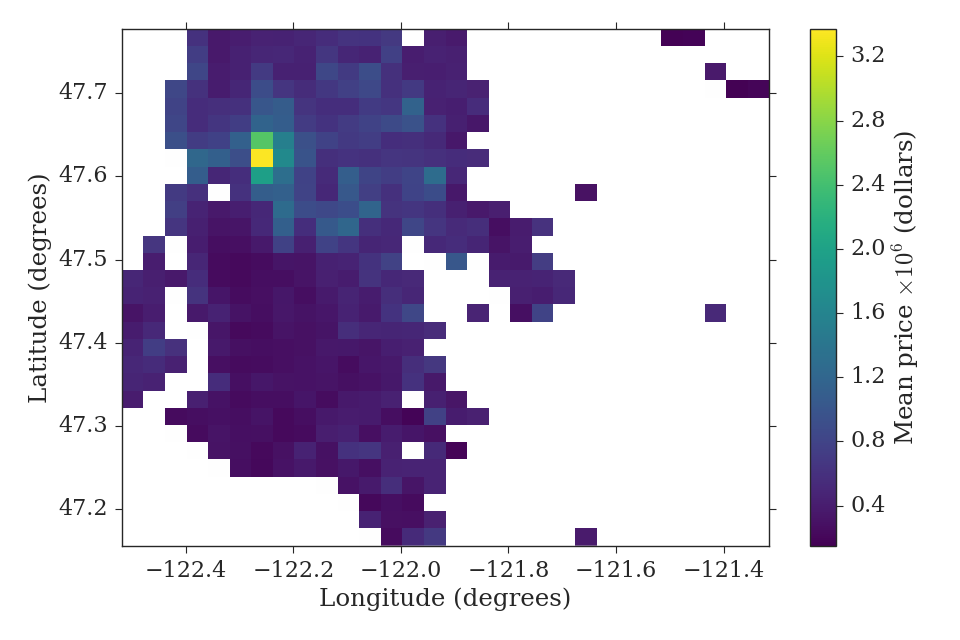

In [5]:
#Plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#im = ax.pcolormesh(xedges,yedges,HistogramMasked.T*10**-6, cmap='viridis')
im = ax.imshow(np.fliplr(HistogramMasked*10**-6).T, extent=extent, interpolation='None',cmap='viridis')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Mean price $\\times 10^6$ (dollars)')
ax.set_aspect('auto')
ax.set_xlim(xedges[0],xedges[-1])
ax.set_ylim(yedges[0],yedges[-1])
ax.set_xlabel('Longitude (degrees)')
ax.set_ylabel('Latitude (degrees)')
plt.tight_layout()

## Price dependence on square footage

<IPython.core.display.Javascript object>


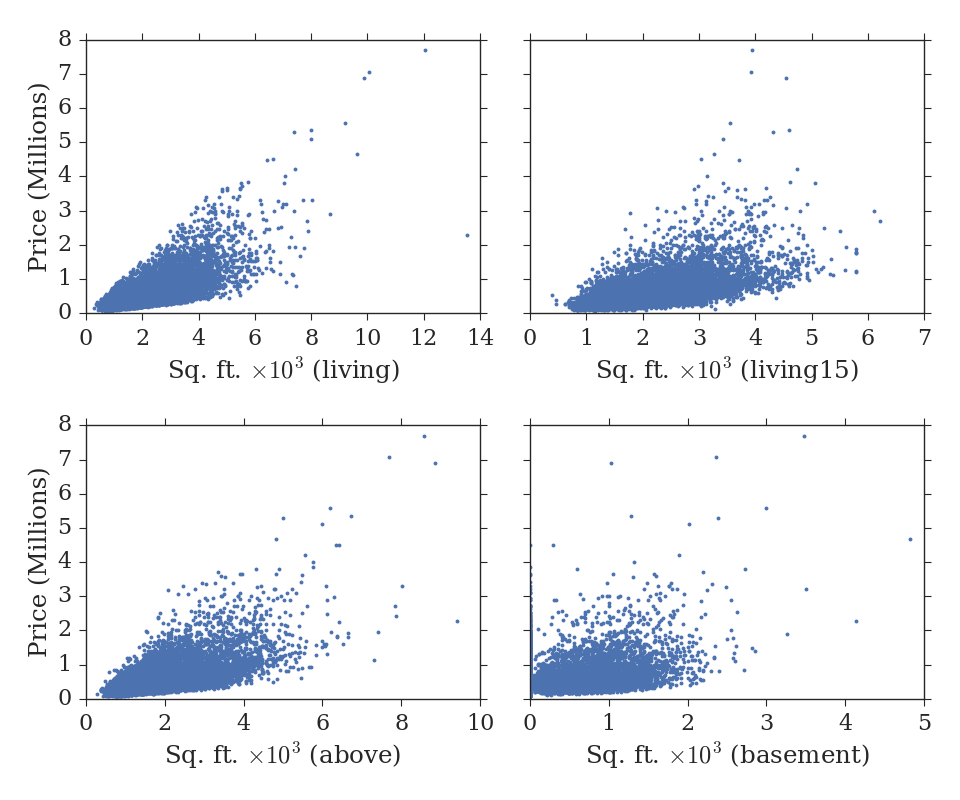

In [14]:
fig,ax = plt.subplots(2,2,sharey=True,figsize=(12, 10))
ax[0,0].plot(House_DataFrame['sqft_living'].values/10**3,target/10**6,marker='.',linestyle='None')
ax[0,0].set_xlabel('Sq. ft. $\\times 10^3$ (living)')
ax[0,0].set_ylabel('Price (Millions)')
ax[0,1].plot(House_DataFrame['sqft_living15'].values/10**3,target/10**6,marker='.',linestyle='None')
ax[0,1].set_xlabel('Sq. ft. $\\times 10^3$ (living15)') #Whatever 15 means...
ax[1,0].plot(House_DataFrame['sqft_above'].values/10**3,target/10**6,marker='.',linestyle='None')
ax[1,0].set_xlabel('Sq. ft. $\\times 10^3$ (above)')
ax[1,0].set_ylabel('Price (Millions)')
ax[1,1].plot(House_DataFrame['sqft_basement'].values/10**3,target/10**6,marker='.',linestyle='None')
ax[1,1].set_xlabel('Sq. ft. $\\times 10^3$ (basement)')
plt.tight_layout()

# Regression

## Split data into training and testing sets

In [17]:
train_data, test_data, train_target, test_target = train_test_split(data, target, train_size=0.5, random_state=123)
print("Labels for training and testing data")
print(train_target)
print(test_target)

Labels for training and testing data
[ 541100.  799990.  439950. ...,  425000.  640000.  500000.]
[ 150000.  279000.  435000. ...,  692500.  370000.  988500.]


## Ordinary least squares

In [19]:
linreg = LinearRegression()

In [20]:
linreg.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print('Weight coefficients: ', linreg.coef_)
print('y-axis intercept: ', linreg.intercept_)

Weight coefficients:  [ -3.94750620e+04   4.49418959e+04   1.08210788e+02   1.02799761e-01
   5.97614189e+03   6.42853194e+05   5.39435366e+04   2.75871907e+04
   1.03862387e+05   7.29335422e+01   3.52772454e+01  -2.74875034e+03
   1.56323108e+01  -5.43097802e+02   5.91493558e+05  -2.07068887e+05
   1.47277802e+01  -4.35857916e-01]
y-axis intercept:  4516932.40141


In [28]:
lin_train = linreg.predict(train_data)
lin_test = linreg.predict(test_data)
linreg.score(test_data, test_target)

0.69776374897345006

## K-nearest neighbors

In [25]:
for n_neighbors in np.arange(1,11):
    
    knnreg = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    knnreg.fit(train_data, train_target)
    
    knn_train = knnreg.predict(train_data)
    knn_test = knnreg.predict(test_data)
    
    print(knnreg.score(test_data, test_target))

0.238403368935
0.393951114113
0.446039946276
0.469687376383
0.481014591548
0.489076651906
0.494751458749
0.495188332462
0.496785527351
0.496444433054
